In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


import matplotlib.pyplot as plt
import numpy as np

/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
import torch
from torchvision import datasets, transforms

# Define the transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Calculate the lengths for training and validation sets
train_size = int(0.7 * len(full_train_dataset))
val_size = int(0.1 * len(full_train_dataset))
test_size = len(full_train_dataset) - train_size - val_size

# Split the dataset
train_dataset, val_dataset, _ = torch.utils.data.random_split(full_train_dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

print(len(train_loader), len(val_loader), len(test_loader)) 

1313 188 313


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(device)

cpu


/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPool
        x = self.pool(self.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPool
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x

In [6]:
# Load model and set to evaluation mode
model = CNN().to(device)
model.load_state_dict(torch.load("mnist_cnn_lime.pth", map_location=device))
model.eval()

# Function to get one sample for classes 4 to 7
def get_selected_samples(test_loader, selected_classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    selected_samples = {}
    for images, labels in test_loader:
        for i in range(len(labels)):
            label = labels[i].item()
            if label in selected_classes and label not in selected_samples:
                selected_samples[label] = images[i].to(device)
            if len(selected_samples) == len(selected_classes):
                return selected_samples
    return selected_samples

# Fetch samples for classes 4 to 7
selected_samples = get_selected_samples(test_loader)

/tmp/ipykernel_26085/682478914.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mnist_cnn_lime.pth", map_location=device))


Step 0, Target Score: 0.2842, Loss: -0.2573
Step 50, Target Score: 9.1847, Loss: -9.1670
Step 100, Target Score: 9.6072, Loss: -9.5898
Step 150, Target Score: 9.9653, Loss: -9.9478
Step 200, Target Score: 10.0003, Loss: -9.9828
Step 250, Target Score: 9.9986, Loss: -9.9811
Step 300, Target Score: 10.0027, Loss: -9.9852
Step 350, Target Score: 9.9970, Loss: -9.9795
Step 400, Target Score: 10.0013, Loss: -9.9839
Step 450, Target Score: 10.0030, Loss: -9.9855
Step 500, Target Score: 10.0052, Loss: -9.9878
Step 550, Target Score: 10.0005, Loss: -9.9830
Step 600, Target Score: 10.0029, Loss: -9.9854
Step 650, Target Score: 10.0073, Loss: -9.9898
Step 700, Target Score: 10.0052, Loss: -9.9878
Step 750, Target Score: 10.0003, Loss: -9.9829
Step 800, Target Score: 10.0029, Loss: -9.9854
Step 850, Target Score: 10.0051, Loss: -9.9876
Step 900, Target Score: 10.0054, Loss: -9.9880
Step 950, Target Score: 10.0071, Loss: -9.9896


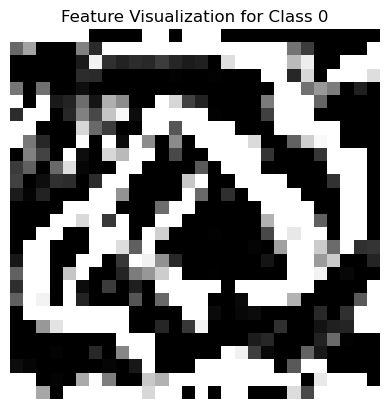

Step 0, Target Score: 1.6281, Loss: -1.5997
Step 50, Target Score: 10.6653, Loss: -10.6498
Step 100, Target Score: 11.2672, Loss: -11.2515
Step 150, Target Score: 11.3183, Loss: -11.3025
Step 200, Target Score: 11.3855, Loss: -11.3696
Step 250, Target Score: 11.5408, Loss: -11.5249
Step 300, Target Score: 11.5423, Loss: -11.5263
Step 350, Target Score: 11.5463, Loss: -11.5304
Step 400, Target Score: 11.5457, Loss: -11.5298
Step 450, Target Score: 11.5416, Loss: -11.5257
Step 500, Target Score: 11.5387, Loss: -11.5228
Step 550, Target Score: 11.5421, Loss: -11.5262
Step 600, Target Score: 11.5407, Loss: -11.5248
Step 650, Target Score: 11.5422, Loss: -11.5263
Step 700, Target Score: 11.5416, Loss: -11.5257
Step 750, Target Score: 11.5427, Loss: -11.5268
Step 800, Target Score: 11.5447, Loss: -11.5288
Step 850, Target Score: 11.5430, Loss: -11.5271
Step 900, Target Score: 11.5429, Loss: -11.5270
Step 950, Target Score: 11.5365, Loss: -11.5206


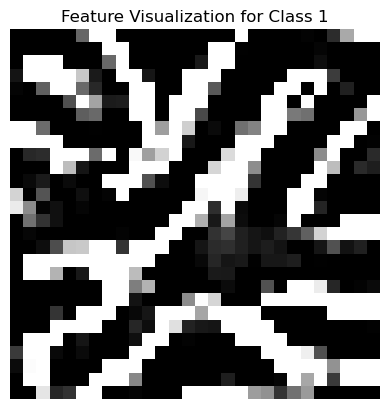

Step 0, Target Score: -0.9392, Loss: 0.9671
Step 50, Target Score: 15.7033, Loss: -15.6860
Step 100, Target Score: 16.3911, Loss: -16.3739
Step 150, Target Score: 16.4519, Loss: -16.4349
Step 200, Target Score: 16.4580, Loss: -16.4410
Step 250, Target Score: 16.4586, Loss: -16.4416
Step 300, Target Score: 16.4828, Loss: -16.4658
Step 350, Target Score: 16.5028, Loss: -16.4858
Step 400, Target Score: 16.5078, Loss: -16.4908
Step 450, Target Score: 16.5127, Loss: -16.4957
Step 500, Target Score: 16.5180, Loss: -16.5010
Step 550, Target Score: 16.5204, Loss: -16.5034
Step 600, Target Score: 16.5180, Loss: -16.5010
Step 650, Target Score: 16.5152, Loss: -16.4982
Step 700, Target Score: 16.5141, Loss: -16.4971
Step 750, Target Score: 16.5189, Loss: -16.5019
Step 800, Target Score: 16.5198, Loss: -16.5027
Step 850, Target Score: 16.5208, Loss: -16.5038
Step 900, Target Score: 16.5131, Loss: -16.4961
Step 950, Target Score: 16.5375, Loss: -16.5205


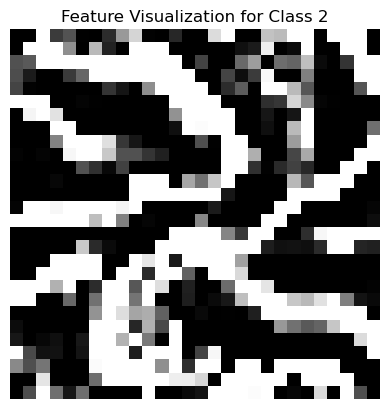

Step 0, Target Score: -1.2265, Loss: 1.2546
Step 50, Target Score: 12.2626, Loss: -12.2453
Step 100, Target Score: 13.4344, Loss: -13.4175
Step 150, Target Score: 13.5943, Loss: -13.5775
Step 200, Target Score: 13.6082, Loss: -13.5915
Step 250, Target Score: 13.7054, Loss: -13.6886
Step 300, Target Score: 13.7136, Loss: -13.6969
Step 350, Target Score: 13.7137, Loss: -13.6969
Step 400, Target Score: 13.7071, Loss: -13.6904
Step 450, Target Score: 13.7116, Loss: -13.6949
Step 500, Target Score: 13.7073, Loss: -13.6906
Step 550, Target Score: 13.7108, Loss: -13.6941
Step 600, Target Score: 13.7089, Loss: -13.6922
Step 650, Target Score: 13.7097, Loss: -13.6930
Step 700, Target Score: 13.7052, Loss: -13.6885
Step 750, Target Score: 13.7081, Loss: -13.6914
Step 800, Target Score: 13.7085, Loss: -13.6917
Step 850, Target Score: 13.7070, Loss: -13.6903
Step 900, Target Score: 13.7086, Loss: -13.6919
Step 950, Target Score: 13.7119, Loss: -13.6952


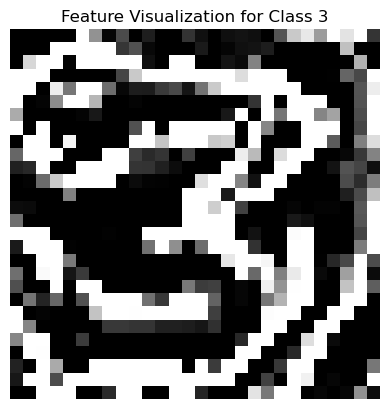

Step 0, Target Score: 0.0404, Loss: -0.0118
Step 50, Target Score: 11.1228, Loss: -11.1052
Step 100, Target Score: 12.4837, Loss: -12.4664
Step 150, Target Score: 12.8518, Loss: -12.8348
Step 200, Target Score: 12.8647, Loss: -12.8478
Step 250, Target Score: 12.9377, Loss: -12.9207
Step 300, Target Score: 12.9486, Loss: -12.9317
Step 350, Target Score: 12.9527, Loss: -12.9357
Step 400, Target Score: 12.9724, Loss: -12.9554
Step 450, Target Score: 12.9822, Loss: -12.9652
Step 500, Target Score: 12.9806, Loss: -12.9637
Step 550, Target Score: 13.0277, Loss: -13.0108
Step 600, Target Score: 13.0676, Loss: -13.0507
Step 650, Target Score: 13.0708, Loss: -13.0539
Step 700, Target Score: 13.0675, Loss: -13.0506
Step 750, Target Score: 13.0671, Loss: -13.0502
Step 800, Target Score: 13.0704, Loss: -13.0535
Step 850, Target Score: 13.0699, Loss: -13.0530
Step 900, Target Score: 13.0680, Loss: -13.0510
Step 950, Target Score: 13.0708, Loss: -13.0539


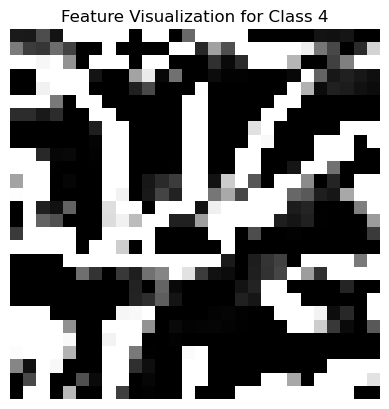

Step 0, Target Score: -0.0568, Loss: 0.0843
Step 50, Target Score: 12.0696, Loss: -12.0532
Step 100, Target Score: 12.3923, Loss: -12.3759
Step 150, Target Score: 12.4741, Loss: -12.4577
Step 200, Target Score: 12.4810, Loss: -12.4646
Step 250, Target Score: 12.4849, Loss: -12.4684
Step 300, Target Score: 12.4889, Loss: -12.4725
Step 350, Target Score: 12.4876, Loss: -12.4712
Step 400, Target Score: 12.4943, Loss: -12.4779
Step 450, Target Score: 12.4908, Loss: -12.4744
Step 500, Target Score: 12.5070, Loss: -12.4905
Step 550, Target Score: 12.4961, Loss: -12.4796
Step 600, Target Score: 12.5039, Loss: -12.4875
Step 650, Target Score: 12.5026, Loss: -12.4861
Step 700, Target Score: 12.5026, Loss: -12.4862
Step 750, Target Score: 12.5076, Loss: -12.4911
Step 800, Target Score: 12.5087, Loss: -12.4922
Step 850, Target Score: 12.5062, Loss: -12.4898
Step 900, Target Score: 12.5046, Loss: -12.4881
Step 950, Target Score: 12.5066, Loss: -12.4901


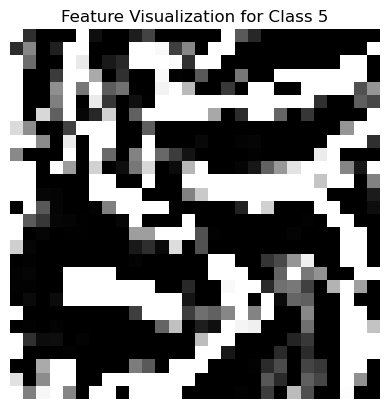

Step 0, Target Score: 0.0477, Loss: -0.0199
Step 50, Target Score: 10.3440, Loss: -10.3267
Step 100, Target Score: 10.9544, Loss: -10.9371
Step 150, Target Score: 11.1602, Loss: -11.1430
Step 200, Target Score: 11.1845, Loss: -11.1672
Step 250, Target Score: 11.1856, Loss: -11.1683
Step 300, Target Score: 11.1853, Loss: -11.1681
Step 350, Target Score: 11.1911, Loss: -11.1739
Step 400, Target Score: 11.1845, Loss: -11.1673
Step 450, Target Score: 11.2342, Loss: -11.2170
Step 500, Target Score: 11.2380, Loss: -11.2209
Step 550, Target Score: 11.2392, Loss: -11.2221
Step 600, Target Score: 11.2457, Loss: -11.2286
Step 650, Target Score: 11.2449, Loss: -11.2277
Step 700, Target Score: 11.2408, Loss: -11.2237
Step 750, Target Score: 11.2396, Loss: -11.2225
Step 800, Target Score: 11.2400, Loss: -11.2228
Step 850, Target Score: 11.2433, Loss: -11.2261
Step 900, Target Score: 11.2400, Loss: -11.2228
Step 950, Target Score: 11.2360, Loss: -11.2189


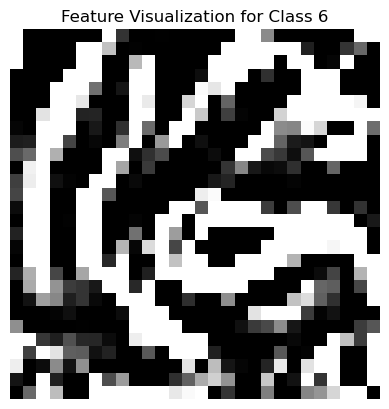

Step 0, Target Score: -1.0746, Loss: 1.1019
Step 50, Target Score: 12.4225, Loss: -12.4055
Step 100, Target Score: 12.7212, Loss: -12.7043
Step 150, Target Score: 12.7346, Loss: -12.7177
Step 200, Target Score: 12.7353, Loss: -12.7184
Step 250, Target Score: 12.7340, Loss: -12.7170
Step 300, Target Score: 12.7381, Loss: -12.7212
Step 350, Target Score: 12.7383, Loss: -12.7214
Step 400, Target Score: 12.7359, Loss: -12.7189
Step 450, Target Score: 12.7392, Loss: -12.7223
Step 500, Target Score: 12.7358, Loss: -12.7189
Step 550, Target Score: 12.7335, Loss: -12.7166
Step 600, Target Score: 12.7355, Loss: -12.7185
Step 650, Target Score: 12.7330, Loss: -12.7161
Step 700, Target Score: 12.7366, Loss: -12.7196
Step 750, Target Score: 12.7410, Loss: -12.7240
Step 800, Target Score: 12.7379, Loss: -12.7209
Step 850, Target Score: 12.7358, Loss: -12.7189
Step 900, Target Score: 12.7366, Loss: -12.7197
Step 950, Target Score: 12.7309, Loss: -12.7140


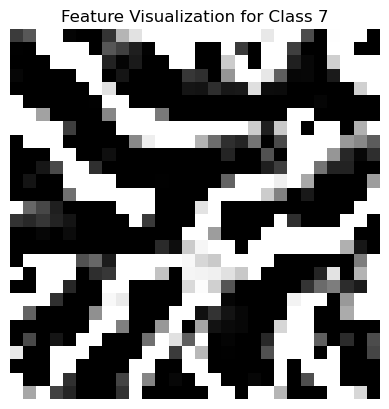

Step 0, Target Score: -1.1563, Loss: 1.1836
Step 50, Target Score: 9.1280, Loss: -9.1107
Step 100, Target Score: 9.6034, Loss: -9.5862
Step 150, Target Score: 9.6951, Loss: -9.6778
Step 200, Target Score: 9.7380, Loss: -9.7207
Step 250, Target Score: 9.7697, Loss: -9.7524
Step 300, Target Score: 9.7727, Loss: -9.7555
Step 350, Target Score: 9.7667, Loss: -9.7494
Step 400, Target Score: 9.7688, Loss: -9.7516
Step 450, Target Score: 9.7683, Loss: -9.7510
Step 500, Target Score: 9.7675, Loss: -9.7502
Step 550, Target Score: 9.7702, Loss: -9.7529
Step 600, Target Score: 9.7679, Loss: -9.7506
Step 650, Target Score: 9.7691, Loss: -9.7518
Step 700, Target Score: 9.7732, Loss: -9.7559
Step 750, Target Score: 9.7772, Loss: -9.7600
Step 800, Target Score: 9.7756, Loss: -9.7583
Step 850, Target Score: 9.7743, Loss: -9.7571
Step 900, Target Score: 9.7765, Loss: -9.7592
Step 950, Target Score: 9.7766, Loss: -9.7593


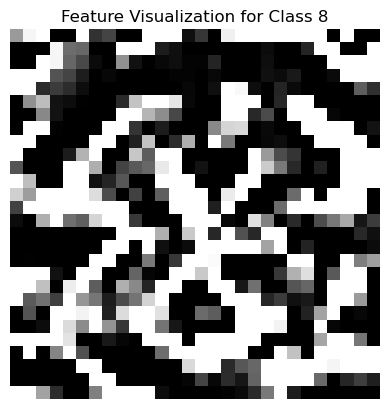

Step 0, Target Score: -0.4539, Loss: 0.4816
Step 50, Target Score: 8.7481, Loss: -8.7310
Step 100, Target Score: 9.0306, Loss: -9.0136
Step 150, Target Score: 9.2100, Loss: -9.1928
Step 200, Target Score: 9.7225, Loss: -9.7053
Step 250, Target Score: 9.9367, Loss: -9.9197
Step 300, Target Score: 9.9460, Loss: -9.9290
Step 350, Target Score: 9.9559, Loss: -9.9388
Step 400, Target Score: 9.9568, Loss: -9.9398
Step 450, Target Score: 9.9585, Loss: -9.9415
Step 500, Target Score: 9.9555, Loss: -9.9385
Step 550, Target Score: 9.9531, Loss: -9.9361
Step 600, Target Score: 9.9535, Loss: -9.9365
Step 650, Target Score: 9.9547, Loss: -9.9377
Step 700, Target Score: 9.9548, Loss: -9.9378
Step 750, Target Score: 9.9587, Loss: -9.9417
Step 800, Target Score: 9.9541, Loss: -9.9371
Step 850, Target Score: 9.9559, Loss: -9.9389
Step 900, Target Score: 9.9567, Loss: -9.9397
Step 950, Target Score: 9.9621, Loss: -9.9451


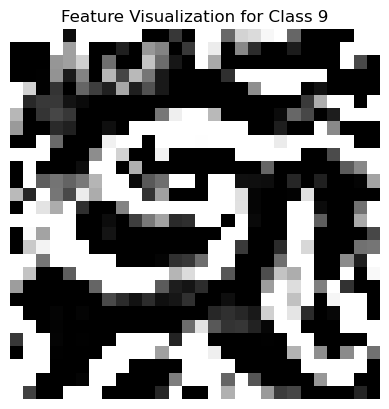

In [35]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.transforms import Normalize

# Make sure the model is in eval mode
model.eval()


for i in range(10):
    # Choose target class (e.g., 4)
    target_class = i

    # Create a random input image (1 channel, 28x28), requires grad
    input_img = torch.randn(1, 1, 28, 28, requires_grad=True, device=device)

    # Optimizer to update the image
    optimizer = torch.optim.Adam([input_img], lr=0.1)

    # Regularization parameters
    tv_weight = 1e-4  # Total Variation loss weight
    l2_weight = 1e-3  # L2 norm on image pixels

    # Total variation regularization
    def total_variation(x):
        tv_h = torch.mean(torch.abs(x[:, :, 1:, :] - x[:, :, :-1, :]))
        tv_w = torch.mean(torch.abs(x[:, :, :, 1:] - x[:, :, :, :-1]))
        return tv_h + tv_w

    # Run optimization loop
    for step in range(1000):
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input_img)

        # Get the score for the target class
        target_score = output[0, target_class]

        # Regularization losses
        tv_loss = total_variation(input_img)
        l2_loss = torch.norm(input_img)

        # Total loss (maximize class score, minimize regularization)
        loss = -target_score + tv_weight * tv_loss + l2_weight * l2_loss
        loss.backward()
        optimizer.step()

        # Clamp the image to a valid range
        with torch.no_grad():
            input_img.clamp_(0, 1)

        if step % 50 == 0:
            print(f"Step {step}, Target Score: {target_score.item():.4f}, Loss: {loss.item():.4f}")

    # Plot the result
    plt.imshow(input_img.detach().cpu().squeeze(), cmap='gray')
    plt.title(f"Feature Visualization for Class {target_class}")
    plt.axis('off')
    plt.show()


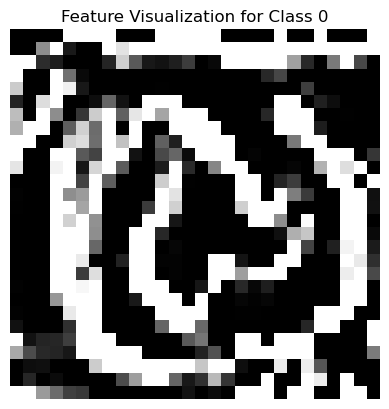

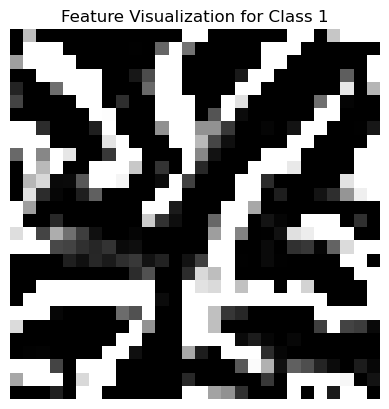

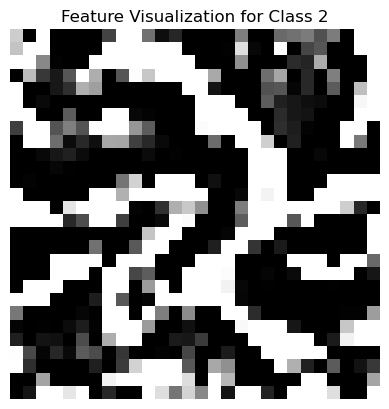

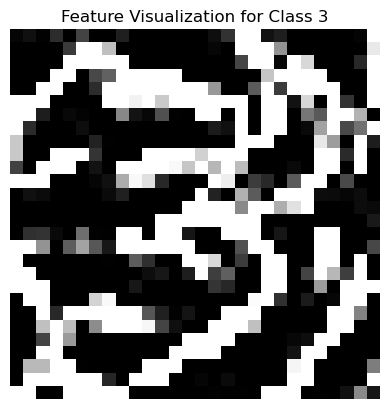

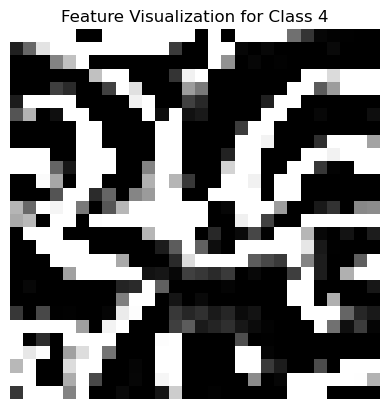

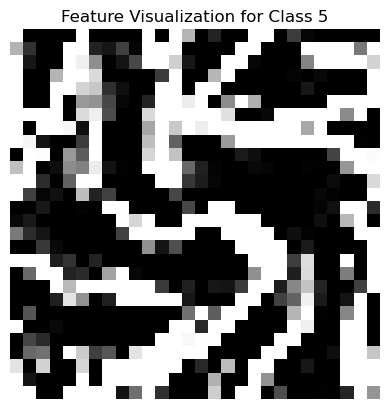

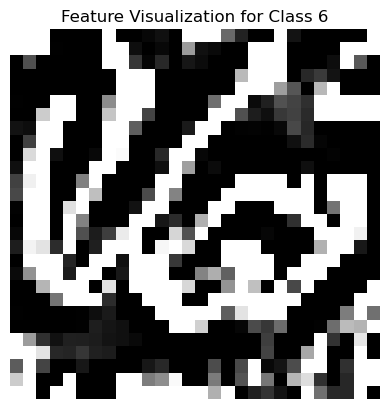

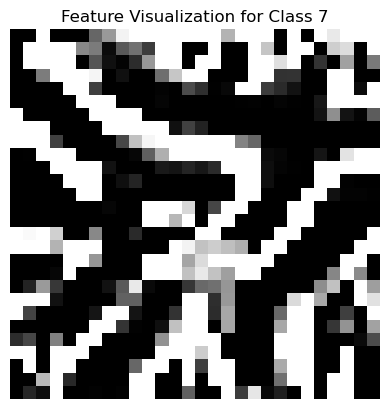

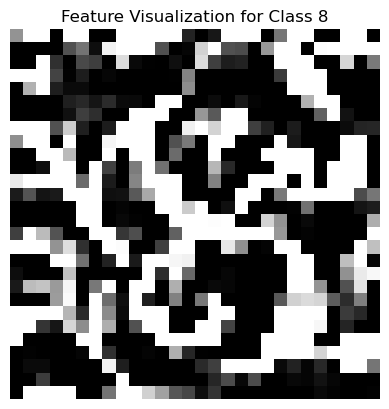

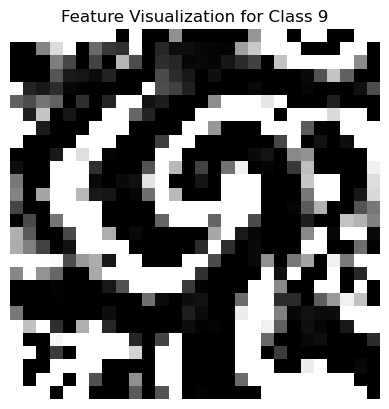


Predicted Class Probabilities for Optimized Images:

Class 0 optimized image:
  Class 0 -> 0.9997
  Class 6 -> 0.0002
  Class 5 -> 0.0000
  Class 2 -> 0.0000
  Class 8 -> 0.0000

Class 1 optimized image:
  Class 1 -> 0.9977
  Class 4 -> 0.0016
  Class 2 -> 0.0007
  Class 7 -> 0.0000
  Class 6 -> 0.0000

Class 2 optimized image:
  Class 2 -> 1.0000
  Class 7 -> 0.0000
  Class 1 -> 0.0000
  Class 4 -> 0.0000
  Class 0 -> 0.0000

Class 3 optimized image:
  Class 3 -> 1.0000
  Class 5 -> 0.0000
  Class 7 -> 0.0000
  Class 9 -> 0.0000
  Class 1 -> 0.0000

Class 4 optimized image:
  Class 4 -> 1.0000
  Class 1 -> 0.0000
  Class 2 -> 0.0000
  Class 7 -> 0.0000
  Class 9 -> 0.0000

Class 5 optimized image:
  Class 5 -> 1.0000
  Class 9 -> 0.0000
  Class 3 -> 0.0000
  Class 6 -> 0.0000
  Class 8 -> 0.0000

Class 6 optimized image:
  Class 6 -> 1.0000
  Class 0 -> 0.0000
  Class 8 -> 0.0000
  Class 5 -> 0.0000
  Class 4 -> 0.0000

Class 7 optimized image:
  Class 7 -> 0.9995
  Class 2 -> 0.0005

In [37]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.utils import save_image

# Ensure model is in eval mode
model.eval()

# Store optimized images for each class
optimized_images = []

for i in range(10):
    target_class = i

    # Start with random noise
    input_img = torch.randn(1, 1, 28, 28, requires_grad=True, device=device)

    optimizer = torch.optim.Adam([input_img], lr=0.1)

    tv_weight = 1e-4
    l2_weight = 1e-3

    def total_variation(x):
        tv_h = torch.mean(torch.abs(x[:, :, 1:, :] - x[:, :, :-1, :]))
        tv_w = torch.mean(torch.abs(x[:, :, :, 1:] - x[:, :, :, :-1]))
        return tv_h + tv_w

    # Optimization loop
    for step in range(1000):
        optimizer.zero_grad()
        output = model(input_img)
        target_score = output[0, target_class]
        tv_loss = total_variation(input_img)
        l2_loss = torch.norm(input_img)
        loss = -target_score + tv_weight * tv_loss + l2_weight * l2_loss
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            input_img.clamp_(0, 1)

    # Detach and store image
    optimized_img = input_img.detach().cpu()
    optimized_images.append(optimized_img)

    # Save image to file
    save_image(optimized_img, f"activationPrototypes/feature_class_{i}.png")

    # Plot the image
    plt.imshow(optimized_img.squeeze(), cmap='gray')
    plt.title(f"Feature Visualization for Class {i}")
    plt.axis('off')
    plt.show()

# Now pass the stored images back into the model
print("\nPredicted Class Probabilities for Optimized Images:\n")

for i, img in enumerate(optimized_images):
    img = img.to(device)
    with torch.no_grad():
        output = model(img)
        probs = F.softmax(output, dim=1).squeeze()
        top5 = torch.topk(probs, 5)

    print(f"Class {i} optimized image:")
    for idx in range(5):
        print(f"  Class {top5.indices[idx].item()} -> {top5.values[idx].item():.4f}")
    print()


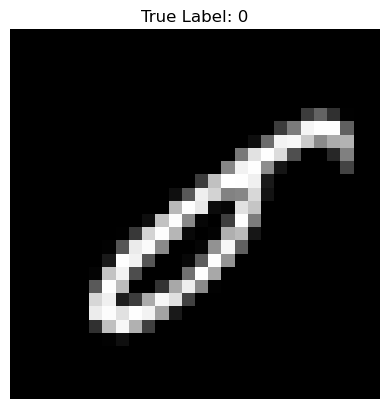

Predicted Class Probabilities:
  Class 0: 0.2740
  Class 1: 0.0199
  Class 2: 0.0190
  Class 3: 0.0000
  Class 4: 0.0015
  Class 5: 0.0653
  Class 6: 0.3330
  Class 7: 0.0005
  Class 8: 0.2866
  Class 9: 0.0000

Predicted Label: 6


In [56]:
# misclassified

import random
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Ensure model is in eval mode
model.eval()

# Get a random test sample
random_idx = random.randint(0, len(test_dataset) - 1)
img, label = test_dataset[random_idx]

# Display the image
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"True Label: {label}")
plt.axis('off')
plt.show()

# Prepare the image tensor
img_tensor = img.unsqueeze(0).to(device)  # Add batch dimension

# Forward pass through the model
with torch.no_grad():
    output = model(img_tensor)
    probs = F.softmax(output, dim=1).squeeze()

# Print class probabilities
print("Predicted Class Probabilities:")
for i in range(10):
    print(f"  Class {i}: {probs[i].item():.4f}")

# Print predicted label
predicted_label = torch.argmax(probs).item()
print(f"\nPredicted Label: {predicted_label}")


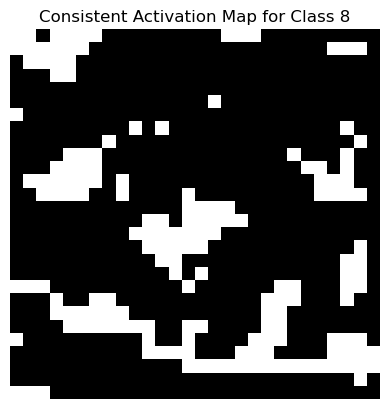

In [76]:
# The noise technique doesnt rly work well.

import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Set model to eval
model.eval()

# Parameters
target_class = 8
num_runs = 80
activation_threshold = 0.2
consistency_threshold = int(num_runs * 0.6)  # Pixels active in > 50% of runs

# Initialize tensor to accumulate activated pixel counts
accumulated_mask = torch.zeros((1, 28, 28), device=device)

# Total variation function
def total_variation(x):
    tv_h = torch.mean(torch.abs(x[:, :, 1:, :] - x[:, :, :-1, :]))
    tv_w = torch.mean(torch.abs(x[:, :, :, 1:] - x[:, :, :, :-1]))
    return tv_h + tv_w

for run in range(num_runs):
    
    
    # Create random input image
    input_img = torch.randn(1, 1, 28, 28, requires_grad=True, device=device)
    optimizer = torch.optim.Adam([input_img], lr=0.1)

    # Optimize
    for step in range(300):  # You can adjust the steps
        optimizer.zero_grad()
        output = model(input_img)
        target_score = output[0, target_class]
        tv_loss = total_variation(input_img)
        l2_loss = torch.norm(input_img)
        loss = -target_score + 1e-4 * tv_loss + 1e-3 * l2_loss
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            input_img.clamp_(0, 1)

    # Binarize based on activation threshold
    with torch.no_grad():
        binary_mask = (input_img > activation_threshold).float()
        accumulated_mask += binary_mask.squeeze(0)

# Filter pixels that were active in more than `consistency_threshold` runs
final_mask = (accumulated_mask > consistency_threshold).float()

# Visualize the final aggregated mask
plt.imshow(final_mask.cpu().squeeze(), cmap='gray')
plt.title(f"Consistent Activation Map for Class {target_class}")
plt.axis('off')
plt.show()


In [77]:
print(final_mask.shape)

final_mask = final_mask.to(device)
final_mask = final_mask.unsqueeze(0)  # Add batch dimension

torch.Size([1, 28, 28])


In [78]:
with torch.no_grad():
    output = model(final_mask)
    probs = F.softmax(output, dim=1).squeeze()
    top5 = torch.topk(probs, 5)

print(f"Class {target_class} optimized image:")
for idx in range(5):
    print(f"  Class {top5.indices[idx].item()} -> {top5.values[idx].item():.4f}")
print()

Class 8 optimized image:
  Class 5 -> 0.4761
  Class 8 -> 0.2190
  Class 3 -> 0.1166
  Class 9 -> 0.0930
  Class 1 -> 0.0472

